# Demand for shared bike Case Study

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. 
This bike can then be returned to another dock belonging to the same system. 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Reading and Understanding the Data
Let's first import necessary libraries and read the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


Inspect the various aspects of the bike dataframe

In [3]:
bike.shape

(730, 16)

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping unnecessary columns:
- 'instant': This is simply a record index and provides no useful information for modeling. Since the DataFrame already has its own index, this column is redundant.
- 'dteday': The date column can be dropped as we have separate columns for month, year and day of the week.
- 'casual' & 'registered': These columns can be dropped as we have the count variable which is the sum of these two variables.

In [5]:
bike = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

After dropping these we have following columns:

In [6]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

Renaming certain columns for better understanding.

In [7]:
bike = bike.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'})

## Visualising the Data
Let's first understand the data through various plots.

We can see through these plots if there's any multicollinearity among variables.
We can also identify if some predictors have a strong association with the outcome variable.

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [8]:
numerical_vars = bike[['count', 'temp', 'atemp', 'humidity', 'windspeed']]

<Figure size 500x700 with 0 Axes>

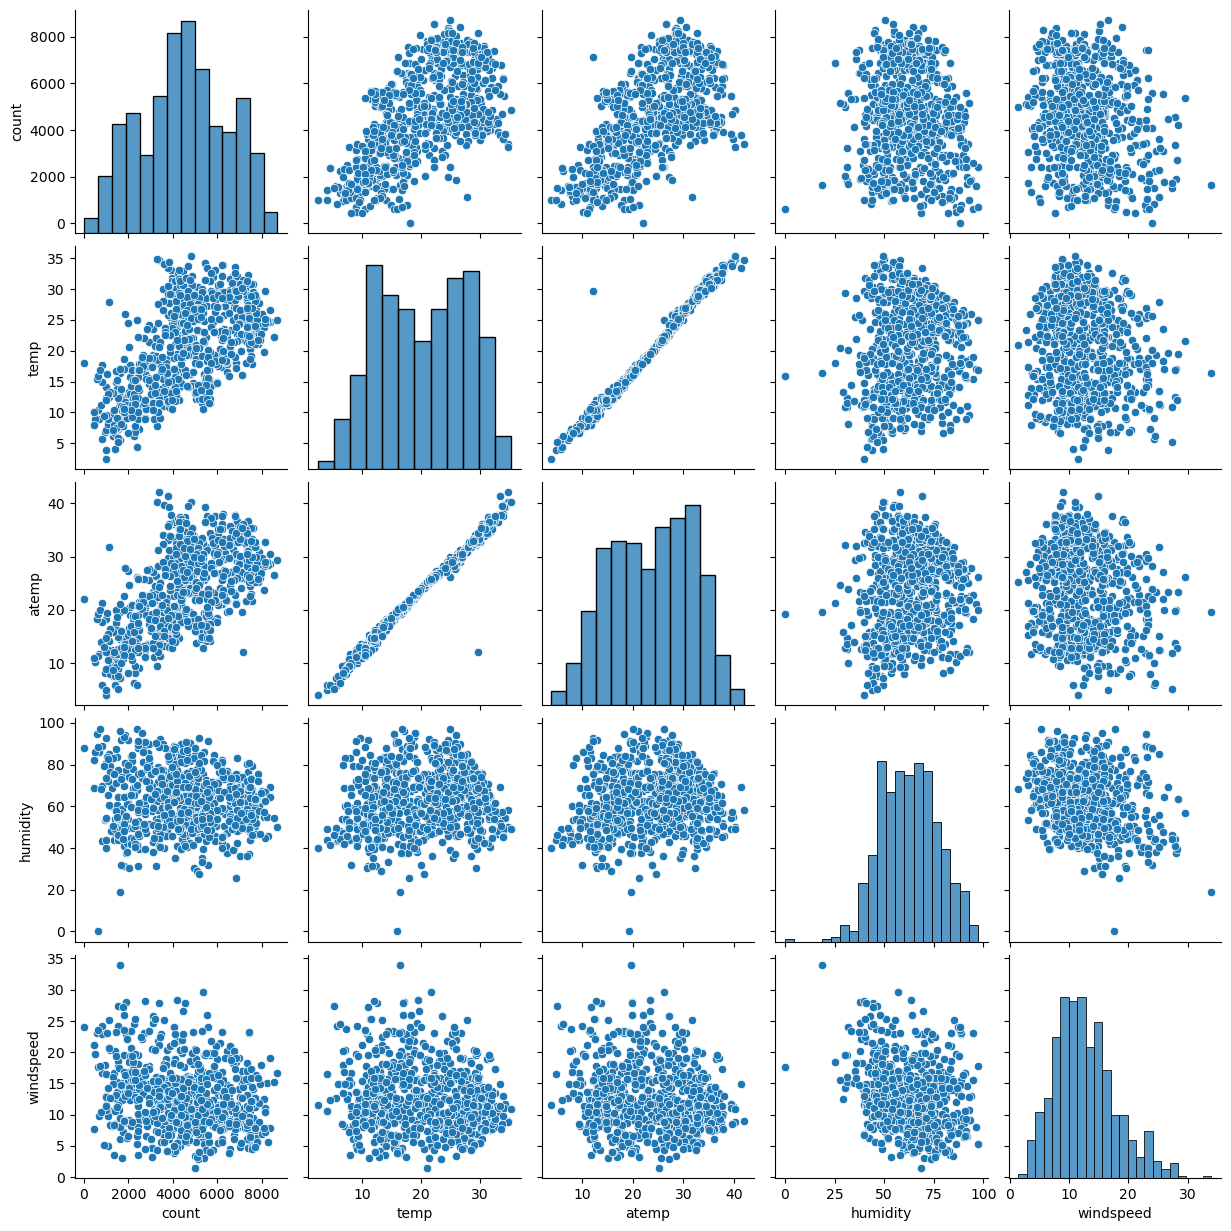

In [9]:
plt.figure(figsize=(5, 7))
sns.pairplot(numerical_vars)
plt.show()

### Visualising Categorical Variables
There are a few categorical variables as well. Let's make a boxplot of these variables.

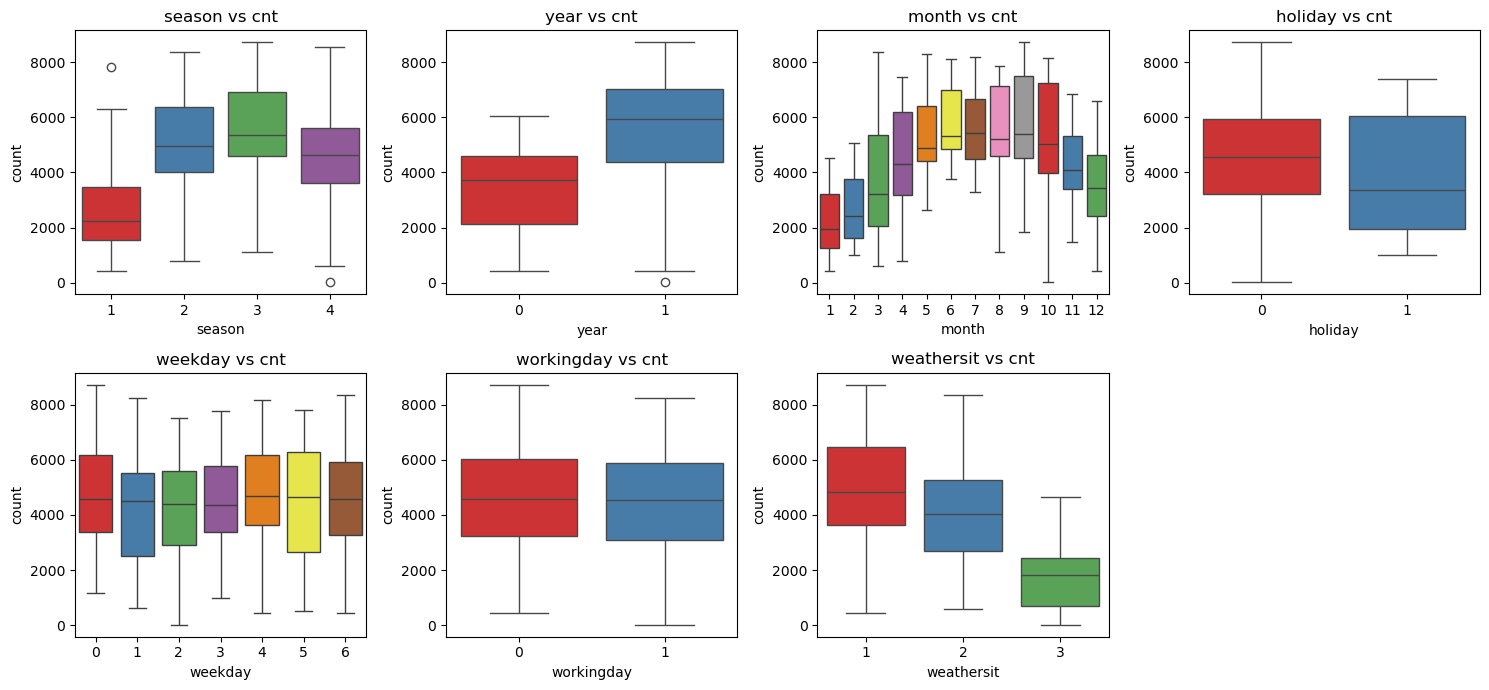

In [10]:
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 7))  
for idx, col in enumerate(categorical_vars):
    plt.subplot(2, 4, idx + 1)  # subplot index starts from 1
    sns.boxplot(x=col, y='count', data=bike, palette='Set1')
    plt.title(f'{col} vs cnt')
    plt.tight_layout()

plt.show()

## Data Preparation

Upon examining the dataset, we observe that several categorical variables—such as 'weathersit' and 'season'—are currently represented using numerical codes (e.g., 1, 2, 3, 4). For improved interpretability and clarity, we will map these codes to their corresponding descriptive labels. Similarly, columns such as 'year', 'month', and 'weekday' can also be transformed by assigning meaningful labels to enhance the readability.

In [11]:
bike['weathersit'] = bike['weathersit'].map({1: 'Clear/Partly Cloudy', 2:'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

In [12]:
bike['season'] = bike['season'].map({1: 'spring', 2:'summer', 3: 'fall', 4: 'winter'})

In [13]:
bike['month'] = bike['month'].map({1: 'January', 2:'February ', 3: 'March ', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                                  8: 'August', 9: 'September', 10:'October', 11:'November', 12:'December'})

In [14]:
bike['weekday'] = bike['weekday'].map({1: 'Monday', 2:'Tuesday', 3: 'Wednesday', 4: 'Thrusday', 5: 'Friday', 6: 'Saturday',
                                      0: 'Sunday'})

In [15]:
# Check the bike dataframe now
bike.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,January,0,Monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thrusday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,Clear/Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,Mist/Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,Mist/Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,Clear/Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Dummy Variables

The variables 'season', 'month', 'weekday', and 'weathersit' are categorical in nature and consist of multiple levels.
we will convert them into a numerical format using dummy variables to make them suitable for machine learning algorithms.

In [17]:
weather = pd.get_dummies(bike['weathersit'], drop_first=True).astype(int)
seasons = pd.get_dummies(bike['season'], drop_first=True).astype(int)
months = pd.get_dummies(bike['month'], drop_first=True).astype(int)
week_day = pd.get_dummies(bike['weekday'], drop_first=True).astype(int)

In [18]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weather, seasons, months, week_day], axis=1)

In [19]:
# Now let's see the head of our dataframe.
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,spring,0,January,0,Monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,January,0,Tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,January,0,Wednesday,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,January,0,Thrusday,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,January,0,Friday,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'Light Rain/Snow', 'Mist/Cloudy', 'spring', 'summer', 'winter',
       'August', 'December', 'February ', 'January', 'July', 'June', 'March ',
       'May', 'November', 'October', 'September', 'Monday', 'Saturday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   year             730 non-null    int64  
 2   month            730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   humidity         730 non-null    float64
 10  windspeed        730 non-null    float64
 11  count            730 non-null    int64  
 12  Light Rain/Snow  730 non-null    int32  
 13  Mist/Cloudy      730 non-null    int32  
 14  spring           730 non-null    int32  
 15  summer           730 non-null    int32  
 16  winter           730 non-null    int32  
 17  August          

Since we have already created dummy variables for 'season', 'month', 'weekday', and 'weathersit', the original columns are now redundant. 
Therefore, we will drop these original categorical columns from the dataset.

In [22]:
bike.drop(['season', 'month', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   count            730 non-null    int64  
 8   Light Rain/Snow  730 non-null    int32  
 9   Mist/Cloudy      730 non-null    int32  
 10  spring           730 non-null    int32  
 11  summer           730 non-null    int32  
 12  winter           730 non-null    int32  
 13  August           730 non-null    int32  
 14  December         730 non-null    int32  
 15  February         730 non-null    int32  
 16  January          730 non-null    int32  
 17  July            

In [24]:
bike.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

Let's start with the first basic step for regression i.e performing a train-test split.

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)

In [26]:
df_train.shape

(510, 30)

In [27]:
df_test.shape

(220, 30)

In [28]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Light Rain/Snow,Mist/Cloudy,...,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'Light Rain/Snow', 'Mist/Cloudy', 'spring',
       'summer', 'winter', 'August', 'December', 'February ', 'January',
       'July', 'June', 'March ', 'May', 'November', 'October', 'September',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Rescaling the Features

To normalize the range of numerical features, we will apply Min-Max Scaling. 
This technique scales the data to a fixed range, typically [0, 1].

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# We will apply the scaler() function to all numerical columns in the dataset, excluding the binary 'yes-no' variables and the dummy variables.
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [32]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Light Rain/Snow,Mist/Cloudy,...,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Light Rain/Snow,Mist/Cloudy,...,May,November,October,September,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.029412,0.345098,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.169124,0.475867,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


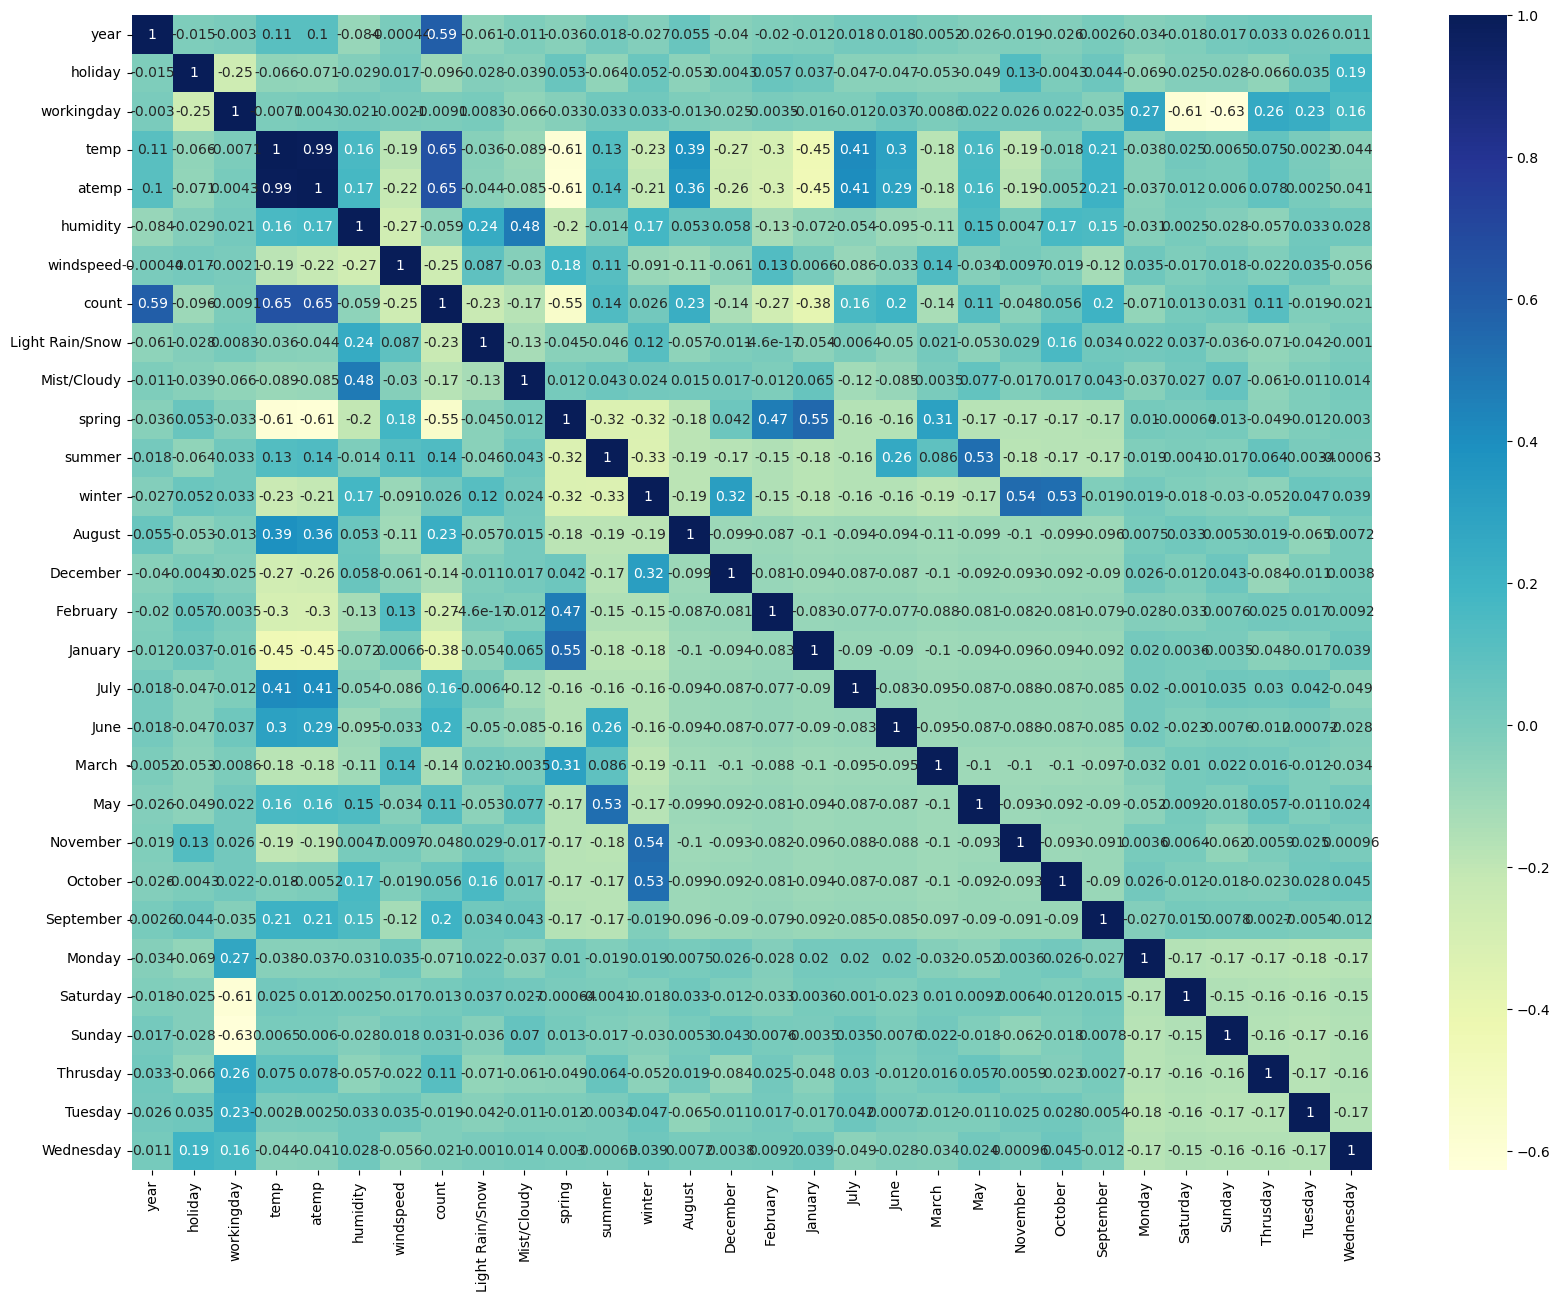

In [35]:
#Let’s examine the correlation coefficients to identify which variables are highly correlated. 
#This can help in understanding relationships between features and in detecting potential multicollinearity.

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As we can notice 'temp' and 'year' has high correlations with count.
- Also 'winter' variable is highly correlated with 'october' and 'november' variable.
- 'January' is highly correlated with 'Spring'.
- 'humidity' and 'Mist/cloudy' have high correlation.

Let's see the scatterplots for count with 'temp' and 'year'

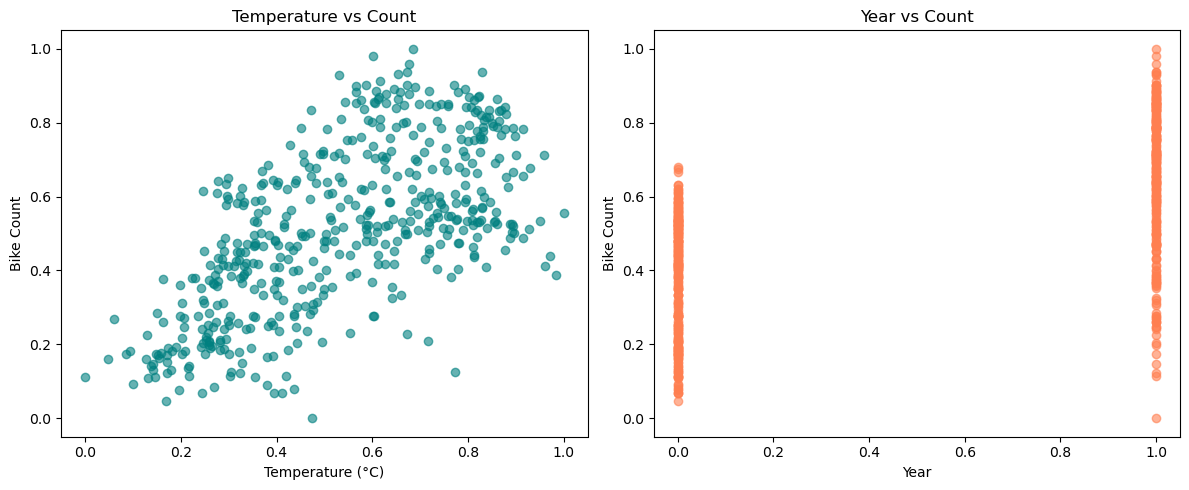

In [36]:
plt.figure(figsize=(12, 5))

# Scatter plot: Temperature vs Count
plt.subplot(1, 2, 1)
plt.scatter(df_train['temp'], df_train['count'], alpha=0.6, color='teal')
plt.title("Temperature vs Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bike Count")

# Scatter plot: Year vs Count
plt.subplot(1, 2, 2)
plt.scatter(df_train['year'], df_train['count'], alpha=0.6, color='coral')
plt.title("Year vs Count")
plt.xlabel("Year")
plt.ylabel("Bike Count")
plt.tight_layout()
plt.show()

We observe a positive correlation between the 'temp' variable and 'count', suggesting that higher temperatures are associated with increased counts. To further investigate this relationship, we will fit a regression line to visualize and quantify the trend.

### Dividing the training dataset into feature variables (X) and the target variable (y) to prepare for model building.

In [37]:
y_train = df_train.pop('count')
X_train = df_train

## Building a linear model

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Light Rain/Snow', True, 1),
 ('Mist/Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February ', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March ', False, 15),
 ('May', False, 9),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thrusday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Light Rain/Snow',
       'Mist/Cloudy', 'spring', 'summer', 'winter', 'December', 'January',
       'July', 'November', 'September'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'August', 'February ', 'June', 'March ', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday',
       'Wednesday'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          8.15e-189
Time:                        11:42:19   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

The variable 'December' exhibits a relatively high p-value, indicating that it is not statistically significant. 
Therefore, we can drop this variable.

In [47]:
X_train_new = X_train_rfe.drop(["December"], axis = 1)

In [48]:
#Rebuilding the model without 'December'
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [49]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          4.41e-189
Time:                        11:42:19   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3032      0.035     

The variable 'November' exhibits a relatively high p-value, indicating that it is not statistically significant. Therefore, we can drop this variable.

In [50]:
X_train_new = X_train_new.drop(["November"], axis = 1)

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train, X_train_lm_3).fit()

In [52]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          7.59e-190
Time:                        11:42:19   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2964      0.035     

The variable 'January' exhibits a relatively high p-value, indicating that it is not statistically significant. Therefore, we can drop this variable.

In [53]:
X_train_new = X_train_new.drop(["January"], axis = 1)
X_train_lm_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()

In [54]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          2.95e-190
Time:                        11:42:20   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034     

In [55]:
X_train_new.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed',
       'Light Rain/Snow', 'Mist/Cloudy', 'spring', 'summer', 'winter', 'July',
       'September'],
      dtype='object')

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
8,spring,5.02
3,temp,3.61
10,winter,3.48
9,summer,2.62
4,humidity,1.89
7,Mist/Cloudy,1.56
11,July,1.48
12,September,1.30
6,Light Rain/Snow,1.24


Dropping 'spring' variable as it has high VIF.

In [57]:
X_train_new = X_train_new.drop(["spring"], axis = 1)
X_train_lm_5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()  

In [58]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          6.89e-190
Time:                        11:42:20   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2262      0.027     

In [59]:
X_train_new.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed',
       'Light Rain/Snow', 'Mist/Cloudy', 'summer', 'winter', 'July',
       'September'],
      dtype='object')

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,humidity,1.87
3,temp,1.60
7,Mist/Cloudy,1.55
10,July,1.43
8,summer,1.33
9,winter,1.29
6,Light Rain/Snow,1.24
11,September,1.19
5,windspeed,1.18


At this stage, our model includes only statistically significant variables with low VIF values, indicating minimal multicollinearity. We can now proceed with the residual analysis to evaluate the model's performance on the training data.

**------------------------------------------------------------------------------------------------------**

## Residual Analysis of the train data

In [61]:
y_train_pred = lm_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

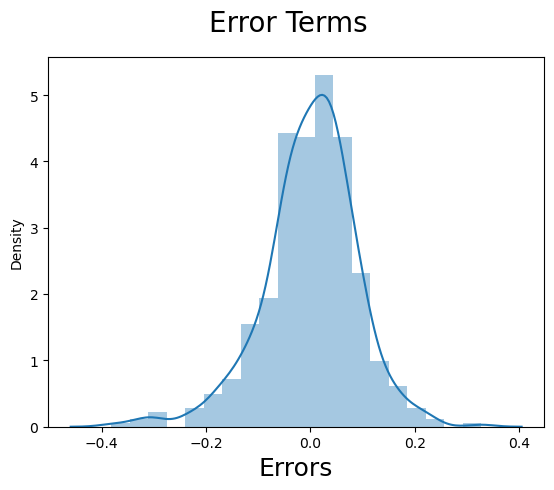

In [62]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

This residual plot indicates that the errors are approximately normally distributed, centered around zero. The bell-shaped curve suggests that the model's assumptions of normality in the residuals hold reasonably well, which supports the validity of the linear regression model.

In [63]:
res = y_train - y_train_pred

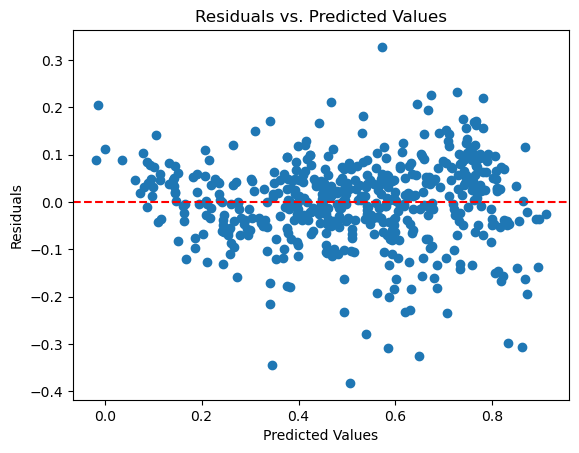

In [64]:
plt.scatter(y_train_pred, res)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

The Residuals vs. Predicted Values plot shows that the residuals are randomly scattered around the horizontal axis (y = 0), with no clear pattern. This randomness indicates that the model captures the linear relationship between the features and the target variable reasonably well.

## Making Predictions

### Applying the scaling on the test sets

In [65]:
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [66]:
y_test = df_test.pop('count')
X_test = df_test

In [67]:
X_train_new.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed',
       'Light Rain/Snow', 'Mist/Cloudy', 'summer', 'winter', 'July',
       'September'],
      dtype='object')

In [68]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [69]:
X_train_new.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Light Rain/Snow',
       'Mist/Cloudy', 'summer', 'winter', 'July', 'September'],
      dtype='object')

In [70]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
y_test_pred = lm_5.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

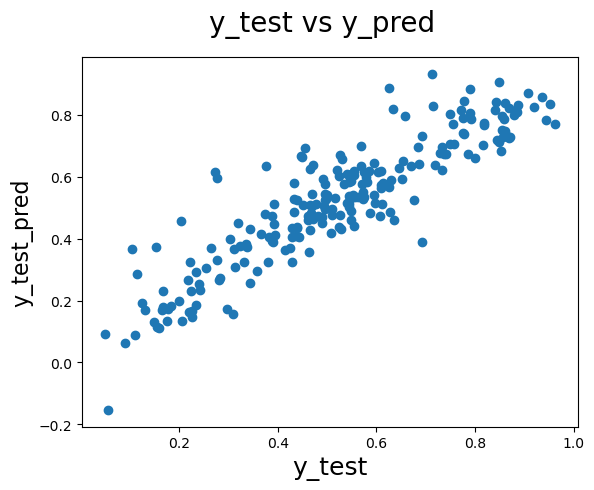

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)

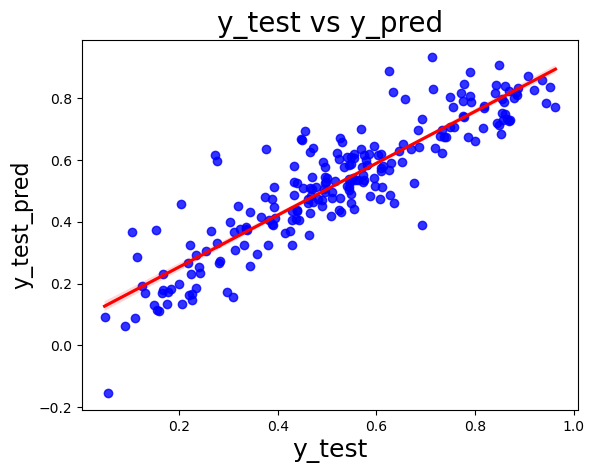

In [73]:
# Visualizing the fit on the test data
# plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

The y_test vs. y_pred regression plot shows a strong linear relationship between the actual and predicted values on the test set. The data points are closely clustered around the red regression line, indicating that the model is making accurate predictions and generalizing well to unseen data. The positive slope and tight spread suggest good predictive performance with minimal bias.

## Model Performance Evaluation and Final Conclusion

In [74]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
train_r2

0.8396046699595116

In [75]:
test_r2 = r2_score(y_test, y_test_pred)
test_r2

0.8050021066128354

- **The R² score on the training set is 0.8396, while the R² score on the test set is 0.8050.
The closeness of these values suggests that the model generalizes well and is not overfitting the training data.**

- **The scatter plot of actual (y_test) vs. predicted (y_test_pred) values demonstrates a strong linear correlation, with points closely aligned along the diagonal, indicating that the model makes accurate predictions on unseen data.**

- **Furthermore, the model achieved an R² score of 0.805 on the test set, suggesting that approximately 80.5% of the variance in the target variable is explained by the model.**

- **This confirms that the linear regression model generalizes well and performs reliably on the test dataset.**